In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [63]:
data = pd.read_csv('backend_logs.csv')

In [64]:
data.isna().sum()

Operation        0
Request time     0
Response time    0
dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Operation      9999 non-null   object
 1   Request time   9999 non-null   object
 2   Response time  9999 non-null   object
dtypes: object(3)
memory usage: 234.5+ KB


In [66]:
data['Request time'] = data['Request time'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
data['Response time'] = data['Response time'].apply(lambda x: pd.to_datetime(x, errors='coerce'))


In [67]:
data = data.dropna()

In [68]:
data['Duration'] = data['Response time'] - data['Request time']

In [69]:
data = data[data['Duration'].dt.total_seconds()>0]

Text(0.5, 1.0, 'Distribution of Performed Events')

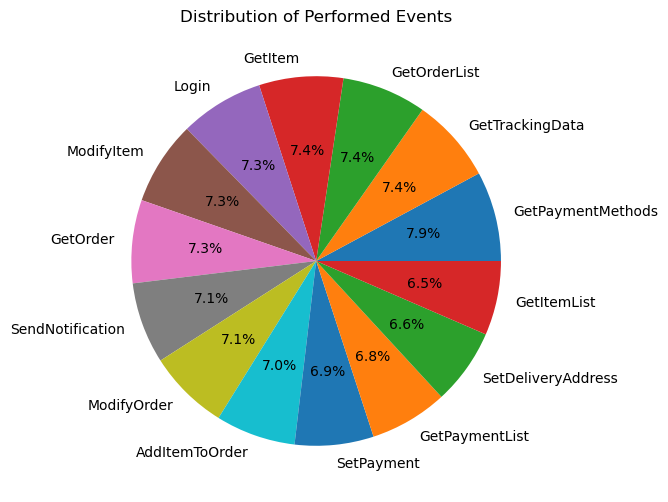

In [79]:
event_counts = data['Operation'].value_counts()
plt.figure(figsize=(8, 6)) 
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Performed Events')

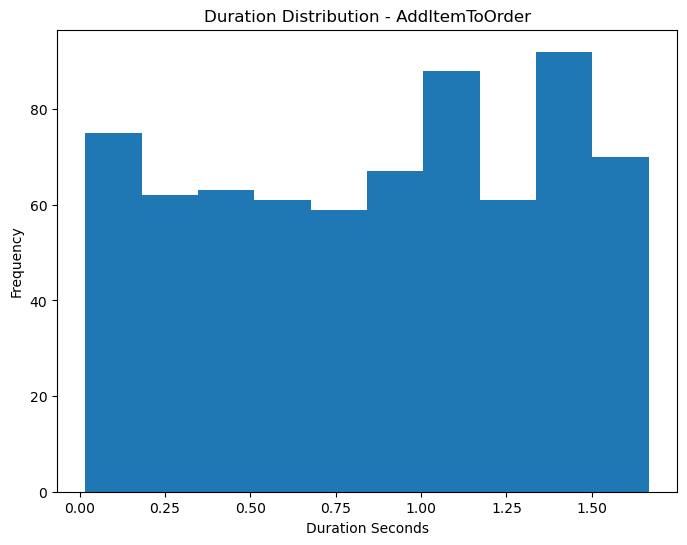

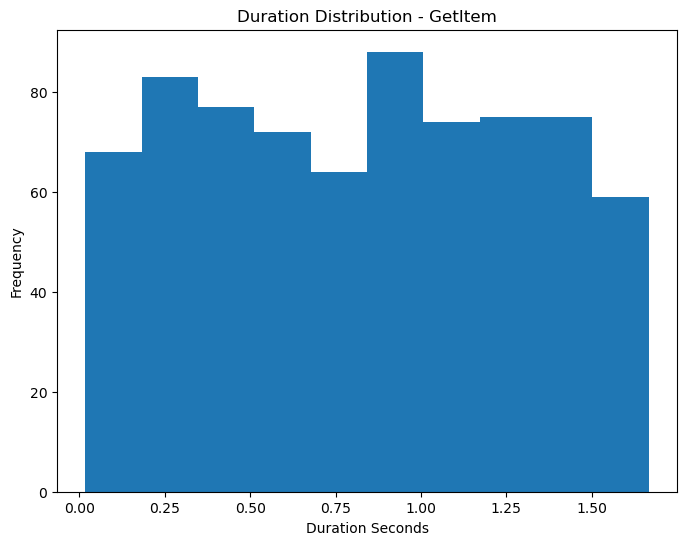

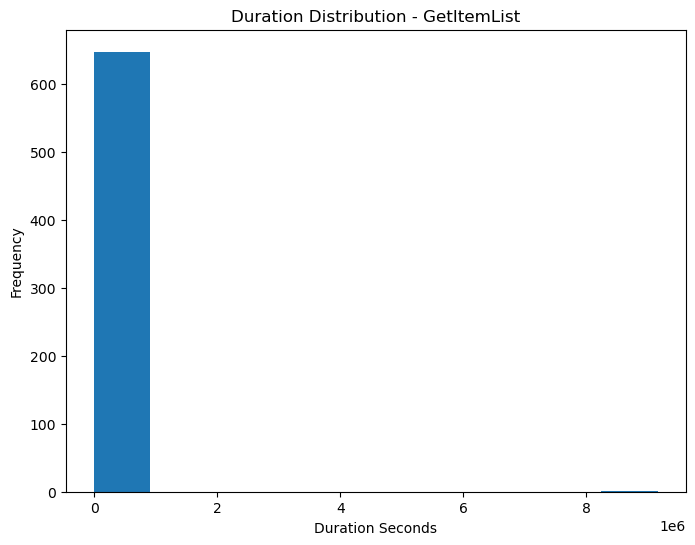

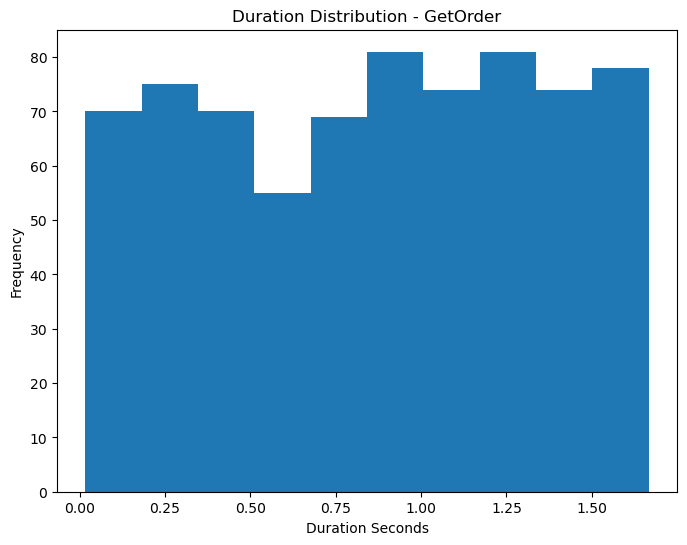

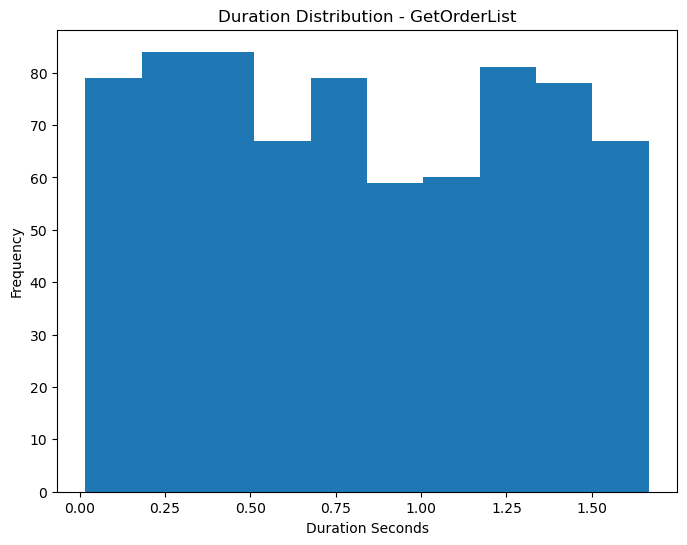

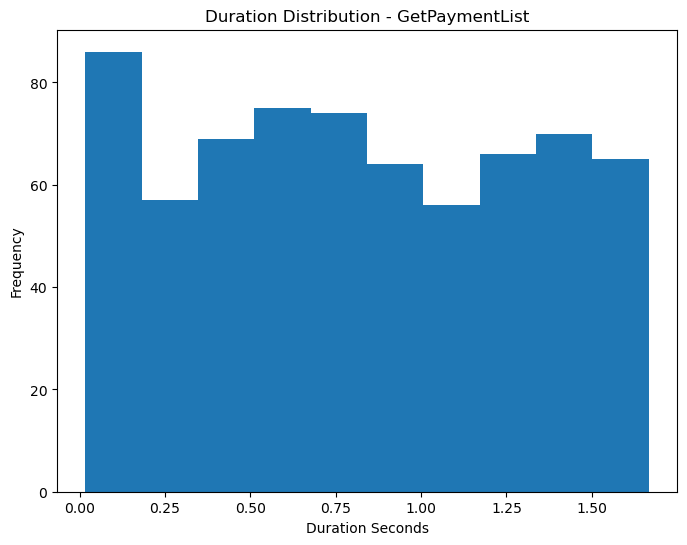

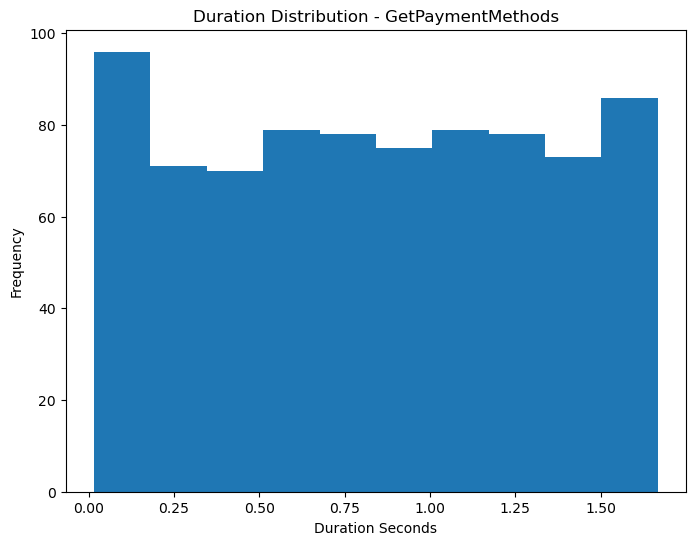

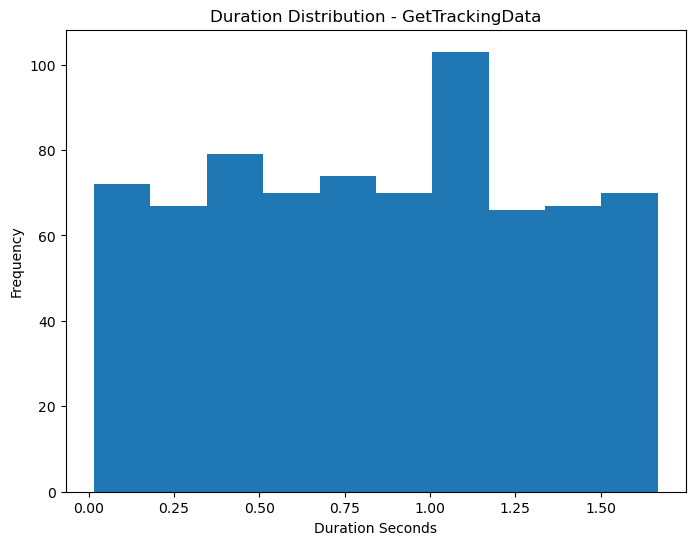

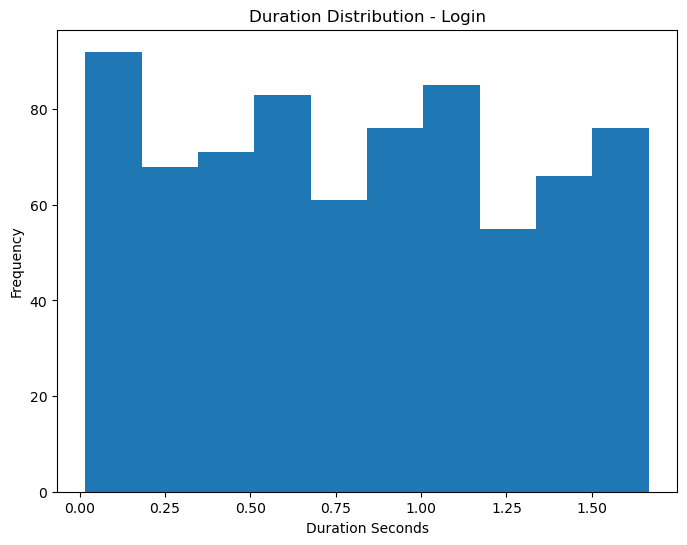

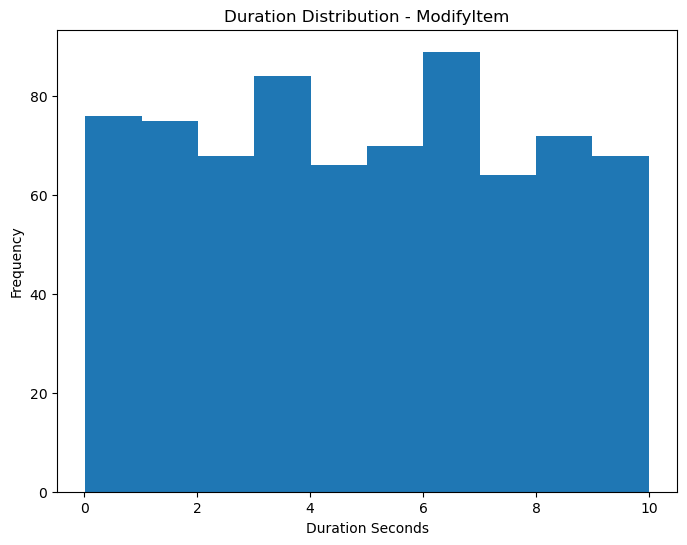

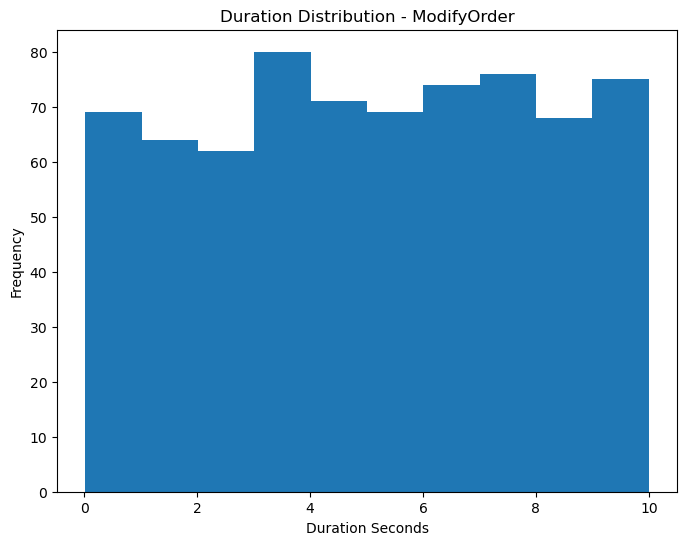

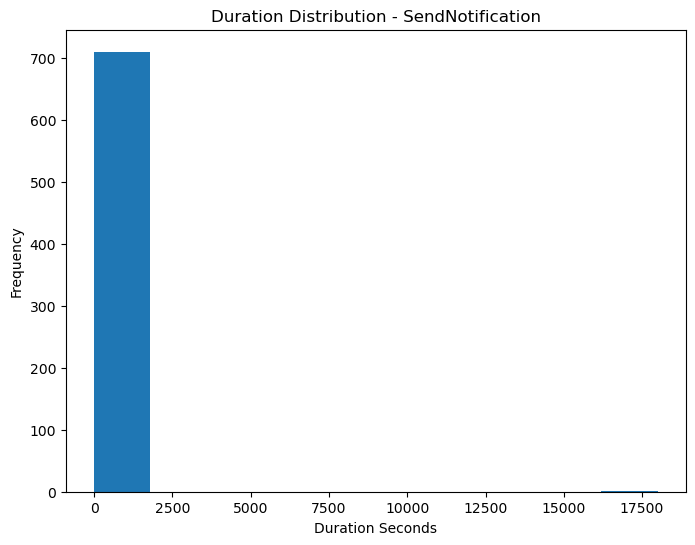

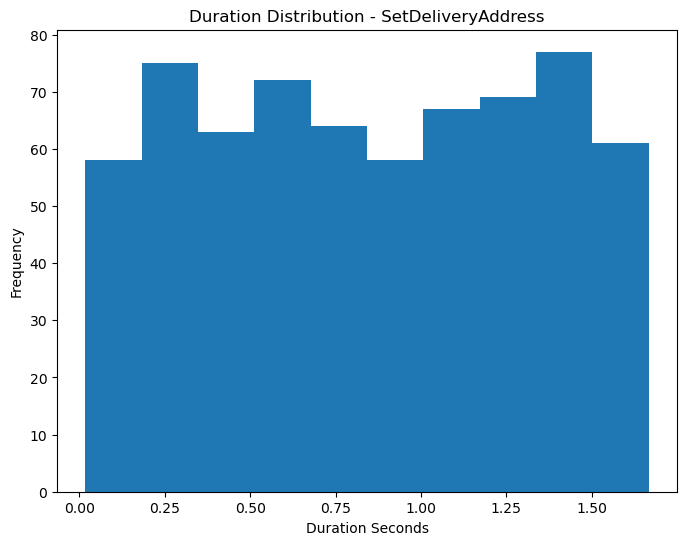

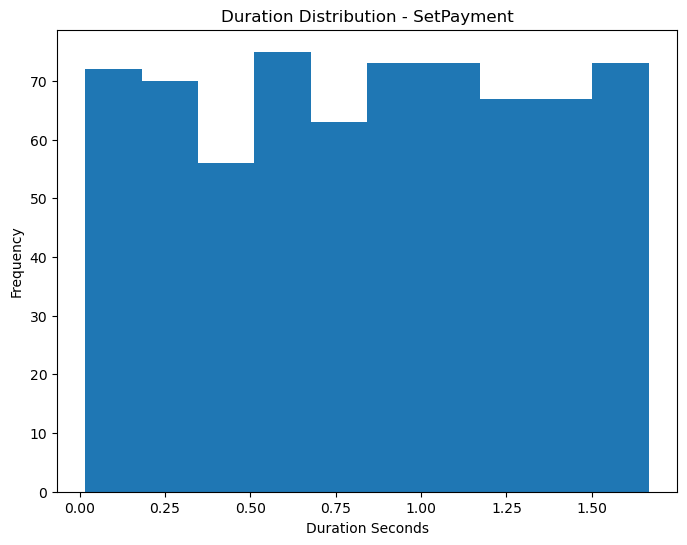

In [83]:
grouped = data.groupby('Operation')
for name, group in grouped:
    plt.figure(figsize=(8, 6))
    plt.hist(group['Duration'].dt.total_seconds())
    plt.xlabel('Duration Seconds')
    plt.ylabel('Frequency')
    plt.title(f'Duration Distribution - {name}')
    plt.show()


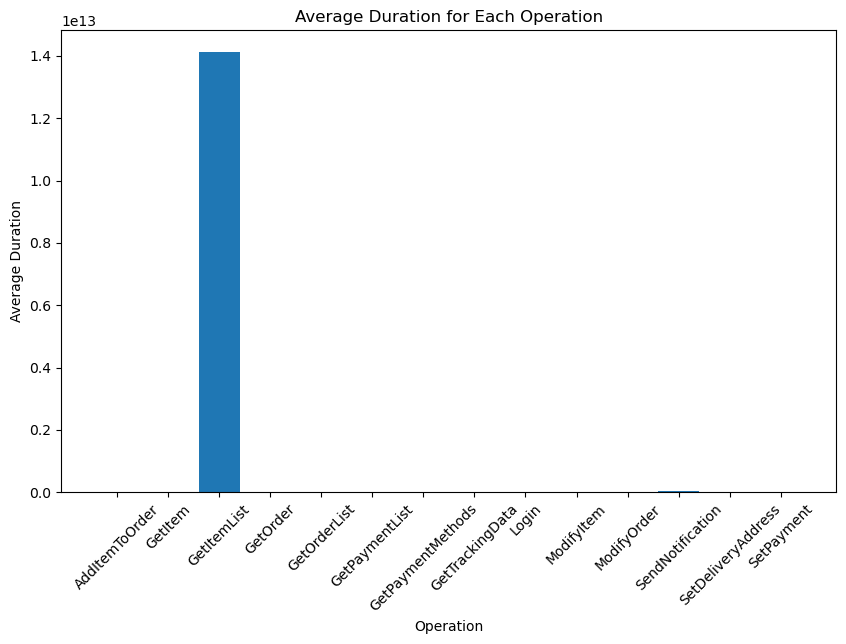

In [82]:
average_duration = data.groupby('Operation')['Duration'].mean()
plt.figure(figsize=(10, 6))
plt.bar(average_duration.index, average_duration)
plt.xlabel('Operation')
plt.ylabel('Average Duration')
plt.title('Average Duration for Each Operation')
plt.xticks(rotation=45)
plt.show()